In [1]:
import sys
#sys.path.append('..')
from QAOA import QAOArunner
from MaxCutProblem import MaxCutProblem
import params
from rustworkx.visualization import mpl_draw as draw_graph
from old_jupyter_vizualisers.load_data import load_graph_from_csv

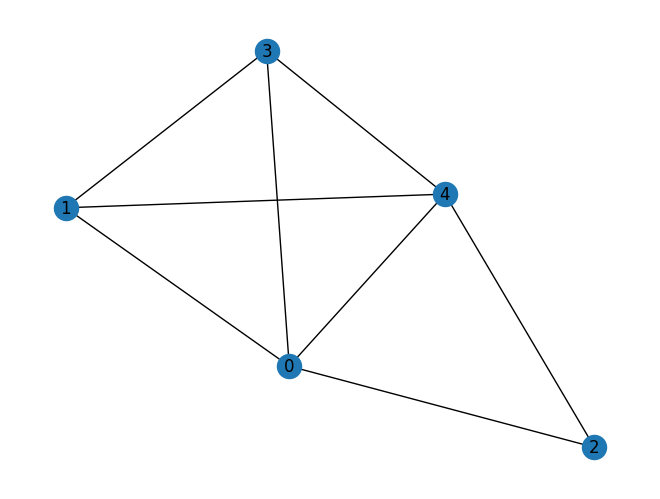

In [2]:
problem = MaxCutProblem()
graphs = problem.get_erdos_renyi_graphs([5,7,9])

graph = graphs[1]
#graph = problem.get_graph_by_name(name)
#graph = load_graph_from_csv('data/11_nodes_links_scand.csv')
#draw_graph(graph, with_labels=True)

draw_graph(graph, with_labels=True)

SparsePauliOp(['IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IZIZI', 'ZIIZI', 'ZIZII', 'ZZIII'],
              coeffs=[0.25 +0.j, 0.5  +0.j, 0.125+0.j, 0.25 +0.j, 0.125+0.j, 0.375+0.j,
 0.125+0.j, 0.5  +0.j])
[0, 1, 1, 0, 1]
3.25
174
0.0184


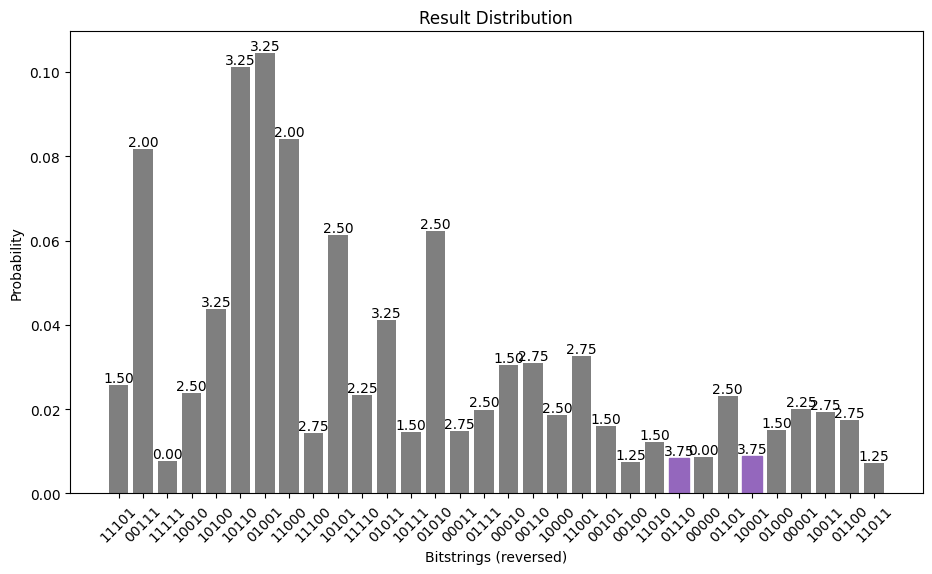

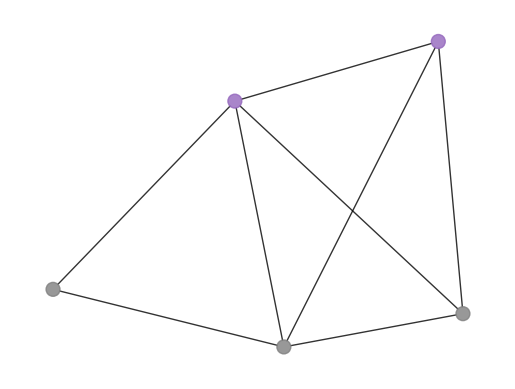

In [3]:
quantum = QAOArunner(graph=graph, 
                     simulation=True,
                     param_initialization= 'uniform',
                     qaoa_variant='vanilla', 
                     optimizer='COBYLA',
                     warm_start=False,
                     depth = 6,
                     vertexcover=False,
                     amount_shots = 5000,
                     errors=True,
                     max_tol = 1e-8,
                     lagrangian_multiplier=2
                     )

quantum.build_circuit()
print(quantum.cost_hamiltonian)
quantum.circuit.draw('mpl', fold=False, idle_wires=False)


quantum.run()
print(quantum.solution)
print(quantum.evaluate_sample())
print(quantum.fev)
#print(quantum.result.x)
print(quantum.get_prob_most_likely_solution())
quantum.print_bitstrings()
quantum.draw_circuit()
quantum.solver.plot_result(quantum.calculate_solution())

In [4]:
import numpy as np 
n = 50
init_params = [
            np.concatenate([
                    np.concatenate([np.random.uniform(0, 2*np.pi, 1), 
                                    np.random.uniform(0, np.pi, 1)])
                    for _ in range(2)
                ]).flatten() for i in range(n)]
print(init_params)

[array([4.1320536 , 1.89018002, 2.38169684, 0.78796952]), array([0.86714649, 0.21067599, 5.3318219 , 2.36073021]), array([6.13829716, 1.40897505, 1.92275187, 0.32386986]), array([3.18793291, 1.20134046, 0.41885301, 1.27755393]), array([2.35524621, 0.56215777, 1.10838134, 2.4595125 ]), array([5.73906157, 3.06228398, 1.33757768, 1.06619038]), array([1.80604164, 0.7776741 , 1.35343578, 0.30306379]), array([1.57188909, 1.93372062, 4.83648549, 1.53362699]), array([4.20677772, 2.34112898, 2.93277939, 1.51056661]), array([1.51641627, 1.07063325, 0.26327385, 1.59075495]), array([1.22341667, 1.36612205, 3.87821394, 0.09140375]), array([1.71649181, 2.37822968, 4.50398616, 2.42627551]), array([2.39315409, 1.17430705, 4.77960466, 0.60167876]), array([5.59515241, 1.71159846, 2.32470151, 1.80742612]), array([4.94485857, 1.96378736, 3.31070522, 1.53536568]), array([4.96627656, 1.96048505, 2.12586062, 2.11030722]), array([2.14009882, 2.39698091, 1.4634838 , 1.70315485]), array([0.35150719, 1.21871622,

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from qiskit_ibm_runtime import EstimatorV2 as Estimator
# Define the grid resolution
num_points = 100
gamma_vals = np.linspace(0, 2 * np.pi, num_points)
beta_vals = np.linspace(0, np.pi, num_points)
Gamma, Beta = np.meshgrid(gamma_vals, beta_vals)
Z = np.zeros_like(Gamma)



minvertexcover = True

quantum = QAOArunner(graph=graph, 
                     backend_mode='statevector',
                     param_initialization= 'gaussian',
                     qaoa_variant='vanilla', 
                     optimizer='COBYLA',
                     warm_start=True,
                     depth = 1,
                     vertexcover=minvertexcover,
                     amount_shots = 5000,
                     max_tol = 1e-8,
                     lagrangian_multiplier=2
                     )
quantum.build_circuit()
estimator = Estimator(mode=quantum.backend)
estimator.options.default_shots = 5000
# Evaluate cost function at each grid point
for i in tqdm(range(Gamma.shape[0]), desc="Evaluating energy landscape"):
    for j in range(Gamma.shape[1]):
        params = np.array([Gamma[i, j], Beta[i, j]])  # Format your params as needed
        Z[i, j] = quantum.cost_func_estimator(params, quantum.circuit, quantum.cost_hamiltonian,estimator)

# Plot the energy landscape
plt.figure(figsize=(8, 6))
cp = plt.contourf(Gamma, Beta, Z, levels=50)
plt.colorbar(cp, label='Energy')
plt.title("Energy Landscape over [γ, β] for MinVertexCover ER graph 5, 2 with warm start")
plt.xlabel("Gamma (γ)")
plt.ylabel("Beta (β)")
plt.show()


TypeError: QAOArunner.__init__() got an unexpected keyword argument 'backend_mode'

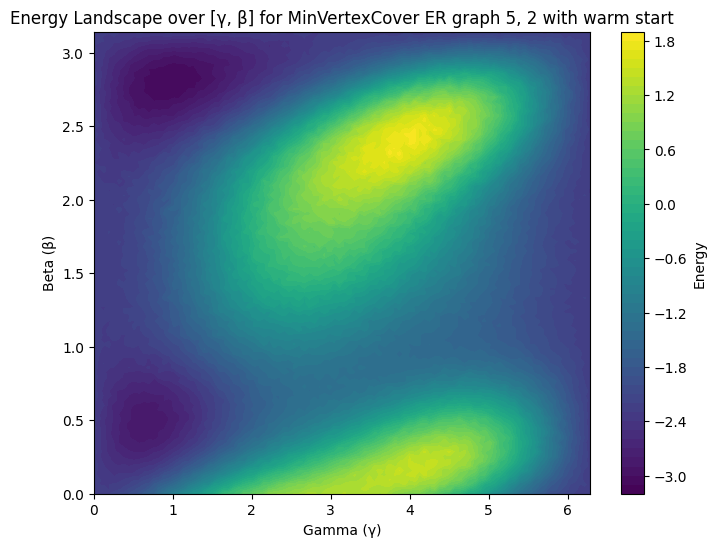

In [ ]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(Gamma, Beta, Z, levels=50)
plt.colorbar(cp, label='Energy')
plt.title("Energy Landscape over [γ, β] for MinVertexCover ER graph 5, 2 with warm start")
plt.xlabel("Gamma (γ)")
plt.ylabel("Beta (β)")
plt.show()

In [ ]:
import pandas as pd

# Save Z as a CSV file
df_z = pd.DataFrame({'x': Gamma.ravel(), 'y': Beta.ravel(), 'z': Z.ravel()})
df_z.columns = ['x', 'y', 'z']
df_z.to_csv('energy_map_erdos_renyi_5_2_MaxCut_warmstarted.csv', index=False)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

strin = 'MinVertexCover' if minvertexcover else 'MaxCut'

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=Z, x=Gamma, y=Beta, colorscale='Viridis')])
fig.update_layout(
    title=f"Percent chance of sampling optimal solution given [γ, β] for Erdos Renyi graph size 5, high prob of edges, for {strin}",
    scene=dict(
        xaxis_title="Gamma (γ)",
        yaxis_title="Beta (β)",
        zaxis_title="Energy"
    )
)
fig.show()



In [ ]:
quantum.solver.plot_result(quantum.calculate_solution())

AttributeError: 'QAOArunner' object has no attribute 'final_params'

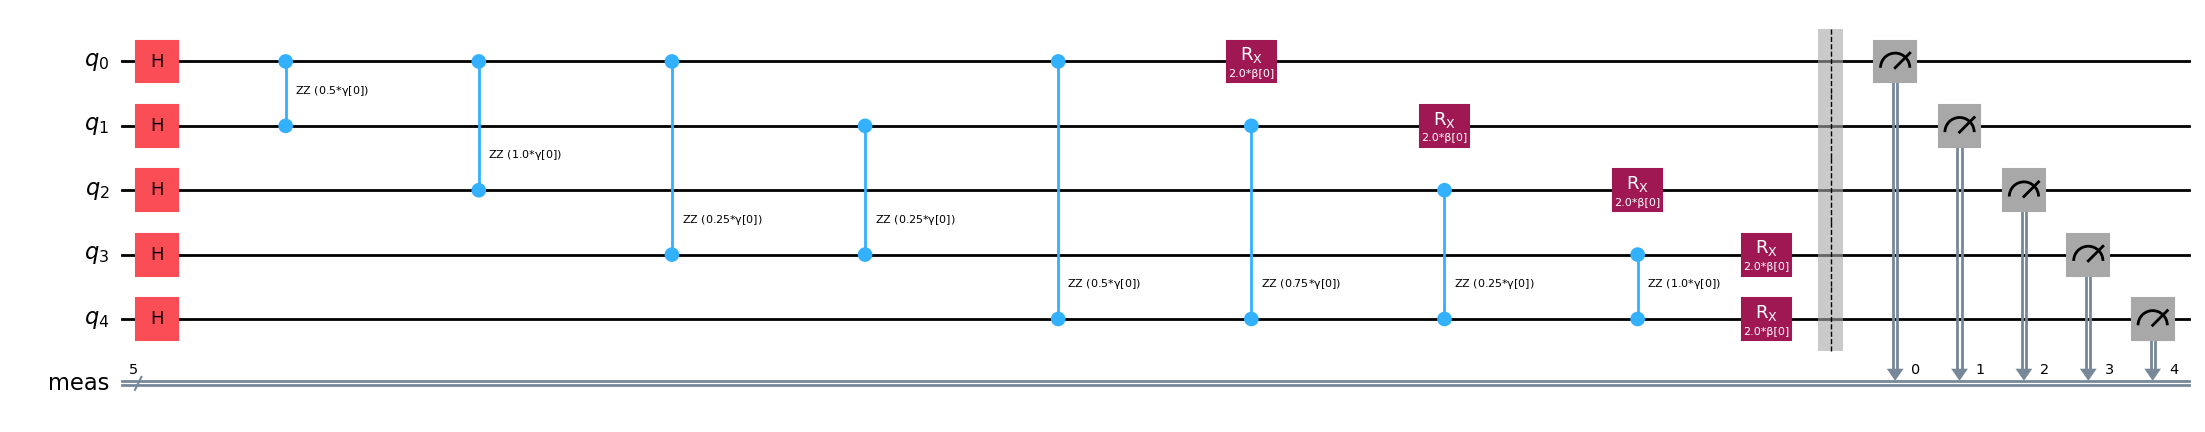

In [ ]:

quantum.circuit.draw('mpl', fold=False, idle_wires=False)


NameError: name 'name' is not defined

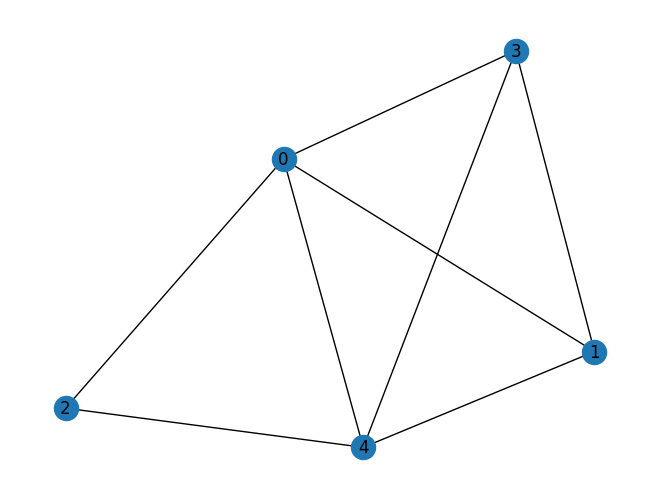

In [ ]:
import networkx as nx
draw_graph(graph, with_labels=True)


nx_graph = nx.Graph()
nx_graph.add_nodes_from(range(graph.num_nodes()))
nx_graph.add_weighted_edges_from(graph.weighted_edge_list())
graph6_str = nx.to_graph6_bytes(nx_graph).decode().strip()
print(f"{name} (graph6): {graph6_str}")

Graph (graph6): >>graph6<<DBk


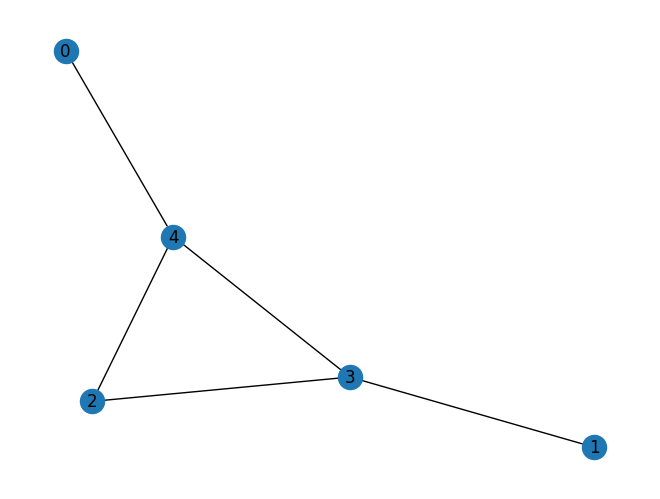

Graph (graph6): >>graph6<<DK{


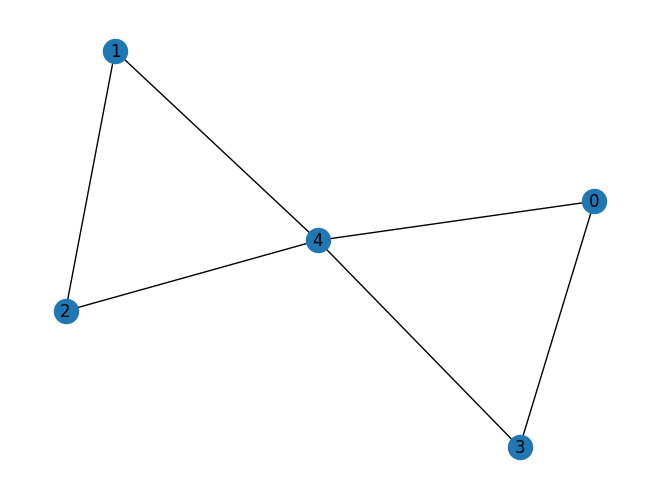

Graph (graph6): >>graph6<<D]{


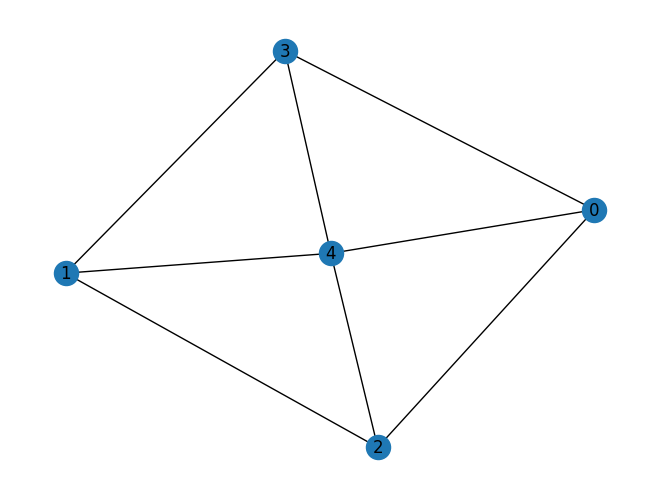

In [ ]:
import networkx as nx
import rustworkx as rx
import matplotlib.pyplot as plt

for g in problem.get_paper_graphs():
    draw_graph(g, with_labels=True)
    nx_graph = nx.Graph()
    nx_graph.add_nodes_from(range(g.num_nodes()))
    nx_graph.add_weighted_edges_from(g.weighted_edge_list())
    graph6_str = nx.to_graph6_bytes(nx_graph).decode().strip()
    print(f"Graph (graph6): {graph6_str}")
    plt.show()

0
1
2


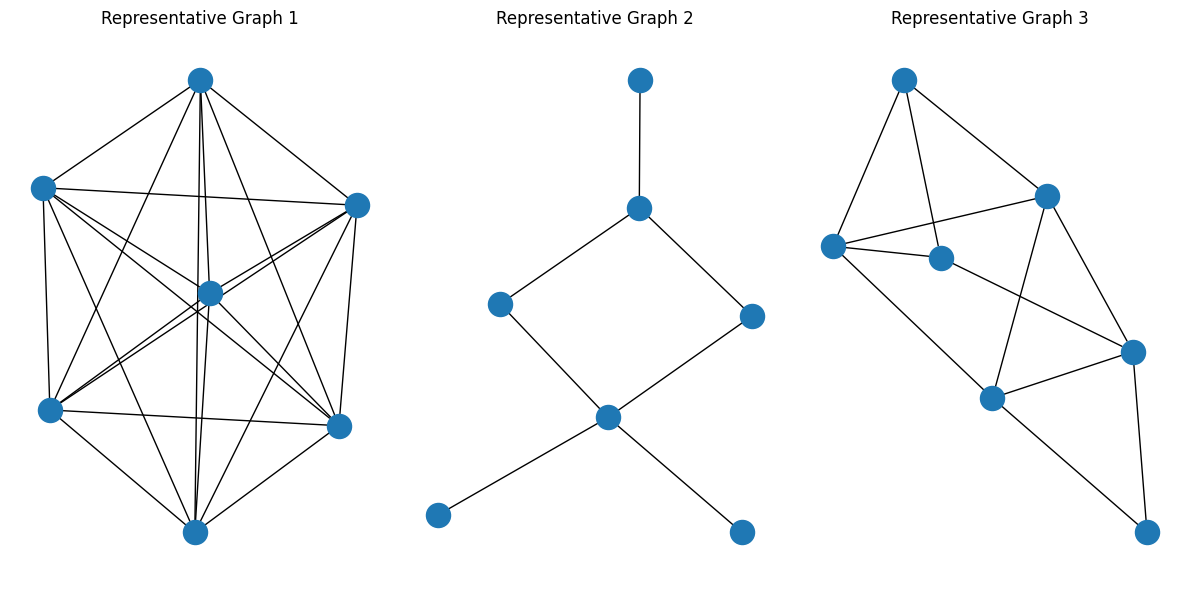

In [ ]:
problem.draw_representative_graphs()

In [ ]:
problem.print_graphs()

Complete Graph (graph6): >>graph6<<F~~~w
Sparse Graph (graph6): >>graph6<<FS_Bg
Dense Graph (graph6): >>graph6<<FS^l_


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=params.api_key
)

job = service.job('cxg38m26t010008cmsng') #You can get this on the ibmq web interface 
job_result = job.result()
job_approx_execution_time = job.metrics() 
print(job_approx_execution_time)
for key, value in job_approx_execution_time.items():
    print(f"{key}: {value}")

RuntimeJobNotFound: 'Job not found: 404 Client Error: Not Found for url: https://api.quantum.ibm.com/runtime/jobs/cxg38m26t010008cmsng. {"errors":[{"code":1291,"message":"Job not found. Job ID: cxg38m26t010008cmsng","solution":"Verify the job ID is correct, and that you have the correct access permissions.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}'

In [ ]:
df_test = pd.read_csv('results_papergraph_depth_param_initialization.csv')

In [ ]:
import itertools

param_initialization = ['gaussian']
optimizer = ['COBYLA']
qaoa_variant = ['vanilla']
warm_start = [False]
backend_mode = ['noisy_sampling']
depth = [8,10]
lagrangian_multiplier = [2]
amount_shots = [5000]
vertexcover = [False]
max_tol = [1e-8]
error_mitigation = [False]

keys = ['param_initialization', 'optimizer', 'qaoa_variant', 'warm_start', 'backend_mode', 
    'depth', 'lagrangian_multiplier', 'amount_shots', 'max_tol', 'vertexcover']
values = [param_initialization, optimizer, qaoa_variant, warm_start, backend_mode, 
      depth, lagrangian_multiplier, amount_shots, max_tol, vertexcover]

combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]
print(f'echo "{combinations}" > test_settings.txt')
#print(len(combinations))

echo "[{'param_initialization': 'gaussian', 'optimizer': 'COBYLA', 'qaoa_variant': 'vanilla', 'warm_start': False, 'backend_mode': 'noisy_sampling', 'depth': 8, 'lagrangian_multiplier': 2, 'amount_shots': 5000, 'max_tol': 1e-08, 'vertexcover': False}, {'param_initialization': 'gaussian', 'optimizer': 'COBYLA', 'qaoa_variant': 'vanilla', 'warm_start': False, 'backend_mode': 'noisy_sampling', 'depth': 10, 'lagrangian_multiplier': 2, 'amount_shots': 5000, 'max_tol': 1e-08, 'vertexcover': False}]" > test_settings.txt


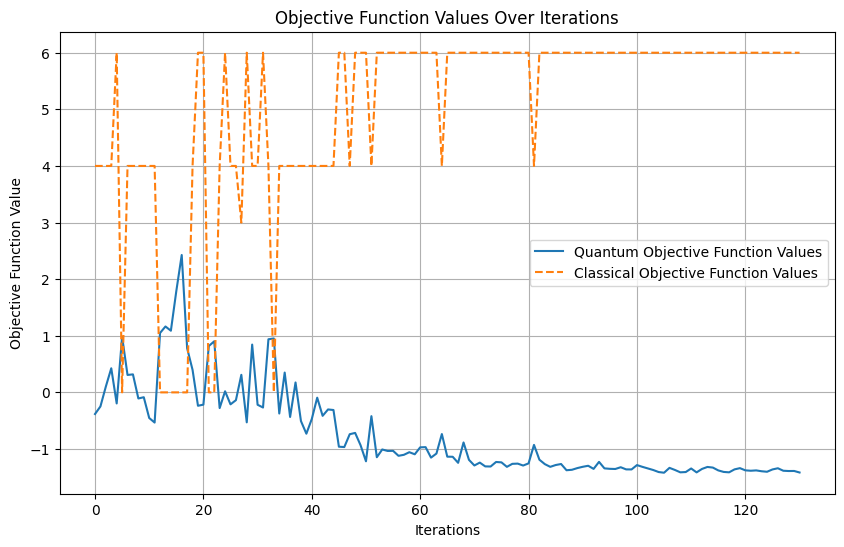

In [ ]:
import matplotlib.pyplot as plt

# Assuming quantum.objective_func_vals and quantum.classical_objective_func_vals are lists or arrays
plt.figure(figsize=(10, 6))
plt.plot(quantum.objective_func_vals, label='Quantum Objective Function Values')
plt.plot(quantum.classical_objective_func_vals, label='Classical Objective Function Values', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Values Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
import numpy as np
pub = (quantum.circuit,)
sampler = Sampler(mode=quantum.backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
print(counts_int)
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int)
def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]





{109: 81, 52: 103, 82: 106, 112: 118, 84: 87, 91: 72, 21: 62, 64: 84, 26: 66, 60: 91, 46: 110, 81: 82, 23: 79, 98: 84, 74: 113, 76: 71, 102: 92, 96: 98, 38: 112, 31: 71, 2: 41, 28: 69, 71: 117, 5: 52, 62: 82, 95: 70, 22: 81, 108: 90, 92: 84, 10: 72, 68: 62, 105: 60, 126: 47, 61: 89, 88: 108, 124: 93, 42: 71, 70: 93, 63: 87, 69: 88, 90: 84, 66: 94, 56: 65, 20: 59, 7: 78, 117: 85, 78: 107, 27: 64, 115: 67, 49: 92, 39: 126, 12: 25, 119: 62, 103: 70, 47: 159, 16: 64, 100: 94, 127: 32, 75: 97, 6: 57, 80: 125, 15: 132, 33: 57, 94: 89, 54: 99, 111: 76, 30: 83, 14: 87, 83: 92, 9: 46, 67: 80, 106: 74, 121: 61, 86: 70, 44: 86, 29: 83, 97: 66, 101: 84, 17: 59, 120: 75, 36: 71, 79: 95, 122: 53, 18: 62, 19: 66, 125: 77, 114: 66, 113: 84, 116: 97, 51: 75, 87: 66, 11: 90, 37: 98, 104: 75, 99: 76, 57: 63, 58: 57, 4: 31, 85: 92, 43: 93, 45: 110, 13: 74, 72: 94, 41: 59, 40: 39, 118: 71, 53: 152, 65: 76, 32: 52, 93: 79, 77: 105, 110: 74, 48: 71, 123: 32, 107: 53, 3: 59, 34: 78, 50: 64, 59: 72, 89: 86, 35

In [ ]:
sorted_final_distribution_int = dict(sorted(final_distribution_int.items(), key=lambda item: item[1]))
print(sorted_final_distribution_int)

{0: 0.0014, 12: 0.0025, 1: 0.0026, 8: 0.0028, 4: 0.0031, 127: 0.0032, 123: 0.0032, 40: 0.0039, 2: 0.0041, 9: 0.0046, 126: 0.0047, 24: 0.0049, 5: 0.0052, 32: 0.0052, 122: 0.0053, 107: 0.0053, 6: 0.0057, 33: 0.0057, 58: 0.0057, 20: 0.0059, 17: 0.0059, 41: 0.0059, 3: 0.0059, 105: 0.006, 121: 0.0061, 21: 0.0062, 68: 0.0062, 119: 0.0062, 18: 0.0062, 25: 0.0062, 57: 0.0063, 27: 0.0064, 16: 0.0064, 50: 0.0064, 56: 0.0065, 26: 0.0066, 97: 0.0066, 19: 0.0066, 114: 0.0066, 87: 0.0066, 115: 0.0067, 28: 0.0069, 95: 0.007, 103: 0.007, 86: 0.007, 76: 0.0071, 31: 0.0071, 42: 0.0071, 36: 0.0071, 118: 0.0071, 48: 0.0071, 91: 0.0072, 10: 0.0072, 59: 0.0072, 106: 0.0074, 13: 0.0074, 110: 0.0074, 120: 0.0075, 51: 0.0075, 104: 0.0075, 111: 0.0076, 99: 0.0076, 65: 0.0076, 125: 0.0077, 7: 0.0078, 34: 0.0078, 23: 0.0079, 93: 0.0079, 67: 0.008, 109: 0.0081, 22: 0.0081, 81: 0.0082, 62: 0.0082, 30: 0.0083, 29: 0.0083, 64: 0.0084, 98: 0.0084, 92: 0.0084, 90: 0.0084, 101: 0.0084, 113: 0.0084, 117: 0.0085, 35: 0.00